# Model Comparison Visualizations

This notebook summarizes model performance and deployment traits using key plots:

- **Radar Plots**: Compare models by family (Classical, HDC, Hybrid) and highlight the top 5 overall.
- **Top-2 Radar**: Shows the best two models from each category.
- **2D Scatter**: Maps all models by performance vs deployability using weighted scores.
- **Sankey Diagram**: Visualizes how models are filtered out by real-time constraints (accuracy, latency, energy, RAM).

Metrics include: *Drunk Accuracy, F1, ROC-AUC, Inference Time, Model Size, Energy, RAM*.  
All scores are normalized for fair visual comparison.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from math import pi

# Define raw metrics for all models
raw_data = {
    "Model": [
        "Bi-LSTM", "CNN", "GRU", "LSTM",
        "BSC", "HRR", "FHRR", "MAP",
        "MAP+RF", "MAP+SVM", "MAP+MLP", "MAP+XGB", "MAP+LightGBM"
    ],
    "Accuracy": [0.768, 0.787, 0.796, 0.787, 0.777, 0.689, 0.750, 0.777, 0.700, 0.794, 0.699, 0.717, 0.711],
    "F1": [0.572, 0.629, 0.851, 0.634, 0.611, 0.367, 0.660, 0.672, 0.624, 0.678, 0.600, 0.626, 0.620],
    "ROC-AUC": [0.685, 0.773, 0.726, 0.695, 0.744, 0.755, 0.742, 0.741, 0.757, 0.753, 0.734, 0.763, 0.767],
    "Inference (ms)": [16.98, 0.26, 29.50, 25.61, 11.07, 10.87, 24.37, 11.16, 12.67, 61.72, 78.55, 14.23, 17.90],
    "Model Size (MB)": [0.70, 0.03, 0.18, 0.23, 61.21, 61.21, 61.21, 61.21, 274.35, 1399.01, 80.97, 62.18, 62.64],
    "Energy (J)": [0.204, 0.003, 0.354, 0.307, 0.133, 0.130, 0.292, 0.134, 0.198, 0.741, 0.943, 0.171, 0.215]
}

# Convert to DataFrame
df = pd.DataFrame(raw_data)

# Normalize all metric columns
df_norm = df.copy()
scaler = MinMaxScaler()

# Columns where higher is better
for col in ["Accuracy", "F1", "ROC-AUC"]:
    df_norm[col] = scaler.fit_transform(df[[col]])

# Columns where lower is better — invert their scale
for col in ["Inference (ms)", "Model Size (MB)", "Energy (J)"]:
    df_norm[col] = 1 - scaler.fit_transform(df[[col]])

# Add average performance and deployment scores
df_norm["AvgPerformance"] = df_norm[["Accuracy", "F1", "ROC-AUC"]].mean(axis=1)
df_norm["AvgDeployability"] = df_norm[["Inference (ms)", "Model Size (MB)", "Energy (J)"]].mean(axis=1)

/var/folders/7h/bnm4bckj5sjf5tj3bvctw_7h0000gn/T/ipykernel_79726/1579215905.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", len(all_models))


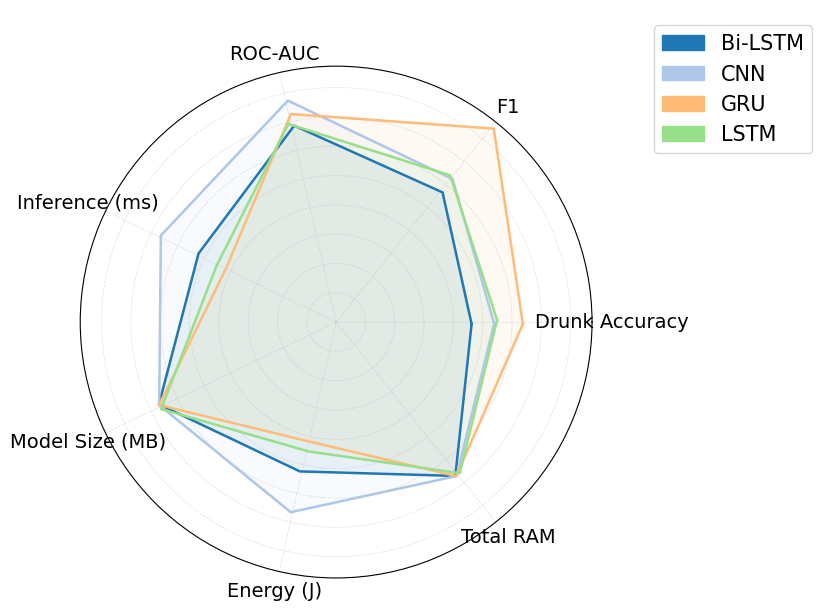

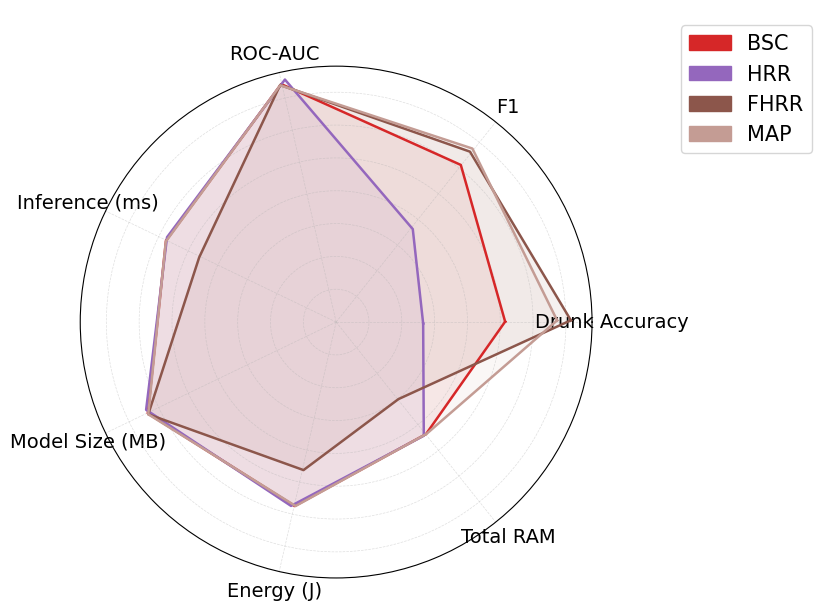

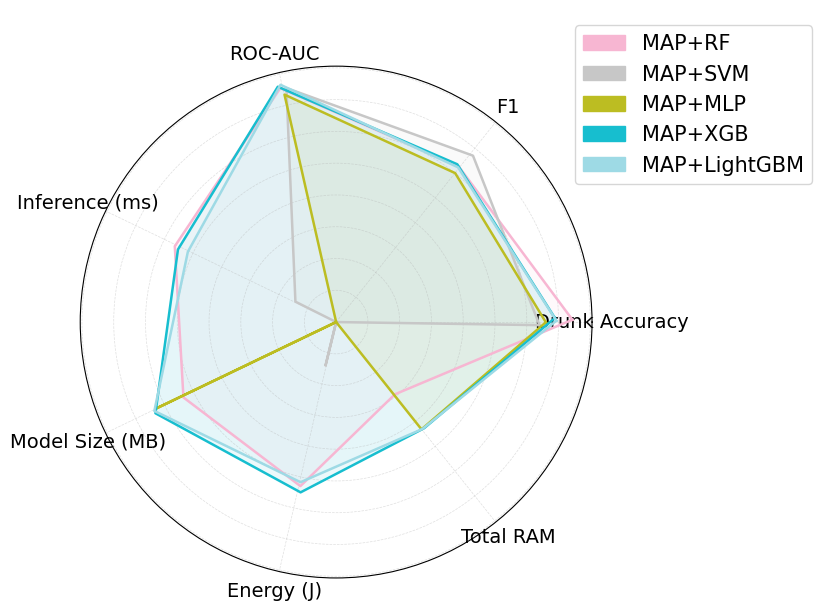

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from math import pi

# -------------------------------
# Raw Data with Drunk Accuracy and Total RAM
# -------------------------------
data = [
    ["Bi-LSTM", 0.420, 0.572, 0.685, 16.98, 0.70, 0.204, 189.03],
    ["CNN",     0.490, 0.629, 0.773, 0.26,  0.03, 0.003, 179.92],
    ["GRU",     0.579, 0.851, 0.726, 29.50, 0.18, 0.354, 181.05],
    ["LSTM",    0.499, 0.634, 0.695, 25.61, 0.23, 0.307, 181.88],
    ["BSC",     0.468, 0.611, 0.744, 11.07, 61.21, 0.133, 881.95],
    ["HRR",     0.241, 0.367, 0.755, 10.87, 61.21, 0.130, 882.94],
    ["FHRR",    0.650, 0.660, 0.742, 24.37, 61.21, 0.292, 1297.80],
    ["MAP",     0.612, 0.672, 0.741, 11.16, 61.21, 0.134, 880.67],
    ["MAP+RF",       0.676, 0.624, 0.757, 12.67, 274.35, 0.198, 1324.55],
    ["MAP+SVM",      0.582, 0.678, 0.753, 61.72, 1399.01, 0.741, 2222.70],
    ["MAP+MLP",      0.600, 0.600, 0.734, 78.55, 80.97, 0.943, 900.41],
    ["MAP+XGB",      0.626, 0.626, 0.763, 14.23, 62.18, 0.171, 893.41],
    ["MAP+LightGBM", 0.630, 0.620, 0.767, 17.90, 62.64, 0.215, 897.80],
]
columns = ["Model", "Drunk Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
df = pd.DataFrame(data, columns=columns)
original_values = df.set_index("Model").copy()

# -------------------------------
# Normalization (exclude performance metrics from normalization)
# -------------------------------
deploy_cols = ["Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
for col in deploy_cols:
    df[col] = df[col].max() - df[col]  # invert so lower = better

scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[deploy_cols] = scaler.fit_transform(df[deploy_cols])

# Compress deployability metrics to give performance more visual space
compression_factor = 1.5
for col in deploy_cols:
    df_norm[col] /= compression_factor

# Restore performance metrics unnormalized
df_norm["F1"] = df["F1"]
df_norm["ROC-AUC"] = df["ROC-AUC"]
df_norm["Drunk Accuracy"] = df["Drunk Accuracy"] * 1.1
df_norm["Drunk Accuracy"] = df_norm["Drunk Accuracy"].clip(upper=1.0)

# -------------------------------
# Global Color and Jitter Maps
# -------------------------------
all_models = df_norm["Model"].tolist()
cmap = get_cmap("tab20", len(all_models))
color_map = {model: cmap(i) for i, model in enumerate(all_models)}
jitter_map = {model: np.random.uniform(-0.02, 0.02) for model in all_models}

# -------------------------------
# Radar Plot Function (No area in legend)
# -------------------------------
def radar_plot_with_jitter(df_subset, metrics, title):
    N = len(metrics)
    angles = np.linspace(0, 2 * pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
    legend_elements = []

    for _, row in df_subset.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        model = row["Model"]
        jitter = jitter_map[model]
        jittered_angles = [(a + jitter) % (2 * pi) for a in angles]

        x = [np.cos(a) * v for a, v in zip(jittered_angles, values)]
        y = [np.sin(a) * v for a, v in zip(jittered_angles, values)]
        # area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))  # removed from label

        color = color_map[model]
        ax.plot(jittered_angles, values, label=model, color=color, linewidth=1.8)
        ax.fill(jittered_angles, values, color=color, alpha=0.08)
        legend_elements.append(Patch(facecolor=color, edgecolor=color, label=model))

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=14)
    ax.set_yticklabels([])
    ax.set_rlabel_position(0)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

    plt.title(title, size=14, pad=30)
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.45, 1.1), fontsize=15)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Metric Names
# -------------------------------
metrics = ["Drunk Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]

# -------------------------------
# Plot by Category
# -------------------------------
radar_plot_with_jitter(
    df_norm[df_norm["Model"].isin(["Bi-LSTM", "CNN", "GRU", "LSTM"])],
    metrics,
    " "
)

radar_plot_with_jitter(
    df_norm[df_norm["Model"].isin(["BSC", "HRR", "FHRR", "MAP"])],
    metrics,
    " "
)

radar_plot_with_jitter(
    df_norm[df_norm["Model"].isin(["MAP+RF", "MAP+SVM", "MAP+MLP", "MAP+XGB", "MAP+LightGBM"])],
    metrics,
    " "
)


/var/folders/7h/bnm4bckj5sjf5tj3bvctw_7h0000gn/T/ipykernel_79726/196766144.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(top_models))


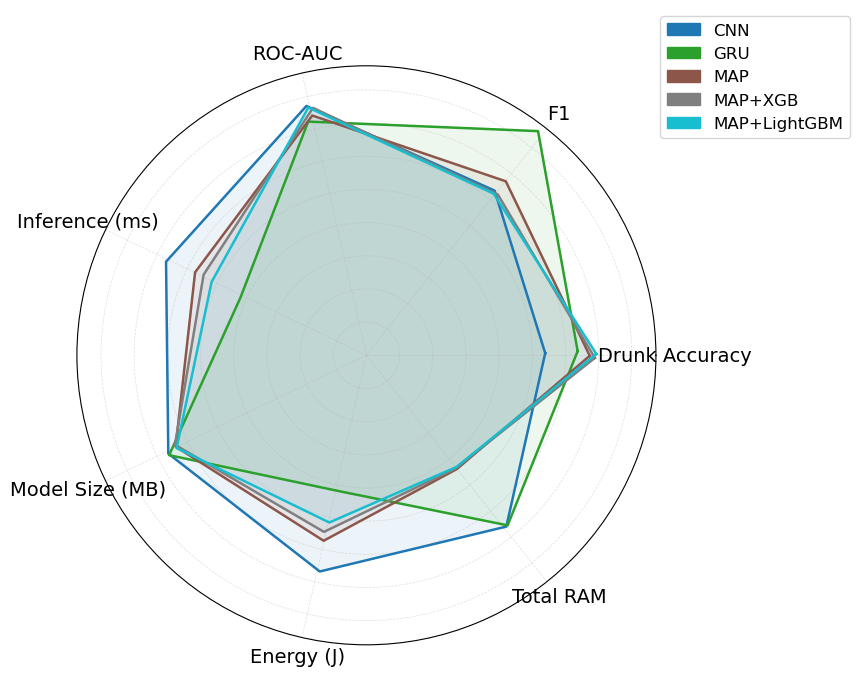

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from math import pi

# -------------------------------
# Raw Data with Drunk Accuracy and Total RAM
# -------------------------------
data = [
    ["Bi-LSTM", 0.420, 0.572, 0.685, 16.98, 0.70, 0.204, 189.03],
    ["CNN",     0.490, 0.629, 0.773, 0.26,  0.03, 0.003, 179.92],
    ["GRU",     0.579, 0.851, 0.726, 29.50, 0.18, 0.354, 181.05],
    ["LSTM",    0.499, 0.634, 0.695, 25.61, 0.23, 0.307, 181.88],
    ["BSC",     0.468, 0.611, 0.744, 11.07, 61.21, 0.133, 881.95],
    ["HRR",     0.241, 0.367, 0.755, 10.87, 61.21, 0.130, 882.94],
    ["FHRR",    0.650, 0.660, 0.742, 24.37, 61.21, 0.292, 1297.80],
    ["MAP",     0.612, 0.672, 0.741, 11.16, 61.21, 0.134, 880.67],
    ["MAP+RF",       0.676, 0.624, 0.757, 12.67, 274.35, 0.198, 1324.55],
    ["MAP+SVM",      0.582, 0.678, 0.753, 61.72, 1399.01, 0.741, 2222.70],
    ["MAP+MLP",      0.600, 0.600, 0.734, 78.55, 80.97, 0.943, 900.41],
    ["MAP+XGB",      0.626, 0.626, 0.763, 14.23, 62.18, 0.171, 893.41],
    ["MAP+LightGBM", 0.630, 0.620, 0.767, 17.90, 62.64, 0.215, 897.80],
]
columns = ["Model", "Drunk Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
df = pd.DataFrame(data, columns=columns)

# -------------------------------
# Normalization (deployment metrics only)
# -------------------------------
deploy_cols = ["Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
for col in deploy_cols:
    df[col] = df[col].max() - df[col]

scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[deploy_cols] = scaler.fit_transform(df[deploy_cols])

# Compress deployability metrics
compression_factor = 1.5
for col in deploy_cols:
    df_norm[col] /= compression_factor

# Restore and adjust performance metrics
df_norm["F1"] = df["F1"]
df_norm["ROC-AUC"] = df["ROC-AUC"]
df_norm["Drunk Accuracy"] = df["Drunk Accuracy"] * 1.1
df_norm["Drunk Accuracy"] = df_norm["Drunk Accuracy"].clip(upper=1.0)

# -------------------------------
# Global Color and Jitter Maps
# -------------------------------
top_models = ["CNN", "GRU", "MAP", "MAP+XGB", "MAP+LightGBM"]
cmap = get_cmap("tab10", len(top_models))
color_map = {model: cmap(i) for i, model in enumerate(top_models)}
jitter_map = {model: np.random.uniform(-0.02, 0.02) for model in top_models}

# -------------------------------
# Radar Plot Function
# -------------------------------
def radar_plot_top_models(df_subset, metrics, title):
    N = len(metrics)
    angles = np.linspace(0, 2 * pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
    legend_elements = []

    for _, row in df_subset.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        model = row["Model"]
        jitter = jitter_map[model]
        jittered_angles = [(a + jitter) % (2 * pi) for a in angles]

        color = color_map[model]
        ax.plot(jittered_angles, values, label=model, color=color, linewidth=1.8)
        ax.fill(jittered_angles, values, color=color, alpha=0.08)
        legend_elements.append(Patch(facecolor=color, edgecolor=color, label=model))

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=14)
    ax.set_yticklabels([])
    ax.set_rlabel_position(0)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

    plt.title(title, size=14, pad=30)
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.35, 1.1), fontsize=12)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Metrics and Call
# -------------------------------
metrics = ["Drunk Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
radar_plot_top_models(df_norm[df_norm["Model"].isin(top_models)], metrics, " ")


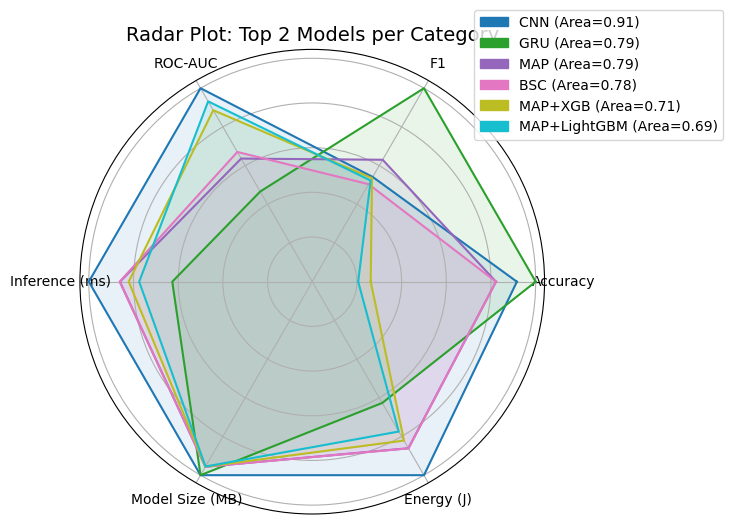

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from math import pi
from sklearn.preprocessing import MinMaxScaler

# ------------------------------
# STEP 1: Define raw metrics
# ------------------------------
data = [
    # Classical models
    ["Bi-LSTM", 0.768, 0.572, 0.685, 16.98, 0.70, 0.204],
    ["CNN",     0.787, 0.629, 0.773, 0.26,  0.03, 0.003],
    ["GRU",     0.796, 0.851, 0.726, 29.50, 0.18, 0.354],
    ["LSTM",    0.787, 0.634, 0.695, 25.61, 0.23, 0.307],

    # HDC models
    ["BSC",  0.777, 0.611, 0.744, 11.07, 61.21, 0.133],
    ["HRR",  0.689, 0.367, 0.755, 10.87, 61.21, 0.130],
    ["FHRR", 0.750, 0.660, 0.742, 24.37, 61.21, 0.292],
    ["MAP",  0.777, 0.672, 0.741, 11.16, 61.21, 0.134],

    # Hybrid models
    ["MAP+RF",       0.700, 0.624, 0.757, 12.67, 274.35, 0.198],
    ["MAP+SVM",      0.794, 0.678, 0.753, 61.72, 1399.01, 0.741],
    ["MAP+MLP",      0.699, 0.600, 0.734, 78.55, 80.97, 0.943],
    ["MAP+XGB",      0.717, 0.626, 0.763, 14.23, 62.18, 0.171],
    ["MAP+LightGBM", 0.711, 0.620, 0.767, 17.90, 62.64, 0.215],
]

columns = ["Model", "Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)"]
df = pd.DataFrame(data, columns=columns)

# ------------------------------
# STEP 2: Normalize metrics
# ------------------------------
performance_cols = ["Accuracy", "F1", "ROC-AUC"]
deploy_cols = ["Inference (ms)", "Model Size (MB)", "Energy (J)"]

# Invert deploy metrics (lower is better)
for col in deploy_cols:
    df[col] = df[col].max() - df[col]

# Normalize all
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[performance_cols + deploy_cols] = scaler.fit_transform(df[performance_cols + deploy_cols])

# Compute area score
df_norm["Area"] = df_norm[performance_cols + deploy_cols].mean(axis=1)

# ------------------------------
# STEP 3: Map categories correctly
# ------------------------------
category_map = {
    "Bi-LSTM": "Classical", "CNN": "Classical", "GRU": "Classical", "LSTM": "Classical",
    "BSC": "HDC", "HRR": "HDC", "FHRR": "HDC", "MAP": "HDC",
    "MAP+RF": "Hybrid", "MAP+SVM": "Hybrid", "MAP+MLP": "Hybrid",
    "MAP+XGB": "Hybrid", "MAP+LightGBM": "Hybrid"
}
df_norm["Category"] = df_norm["Model"].map(category_map)

# ------------------------------
# STEP 4: Get top 2 models per category
# ------------------------------
top_models = pd.concat([
    df_norm[df_norm["Category"] == cat].nlargest(2, "Area")
    for cat in df_norm["Category"].dropna().unique()
]).reset_index(drop=True)

# ------------------------------
# STEP 5: Radar plot function
# ------------------------------
def radar_plot(df, categories, title):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    colors = plt.cm.tab10(np.linspace(0, 1, len(df)))
    patches = []

    for i, row in df.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.plot(angles, values, label=f"{row['Model']} (Area={row['Area']:.2f})", color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])
        patches.append(Patch(color=colors[i], label=f"{row['Model']} (Area={row['Area']:.2f})"))

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticklabels([])
    plt.title(title, size=14)
    plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.4, 1.1))
    plt.tight_layout()
    plt.show()

# ------------------------------
# STEP 6: Plot the radar chart
# ------------------------------
metrics_cols = performance_cols + deploy_cols
radar_plot(top_models, metrics_cols, "Radar Plot: Top 2 Models per Category")


In [ ]:
!pip install adjusttext

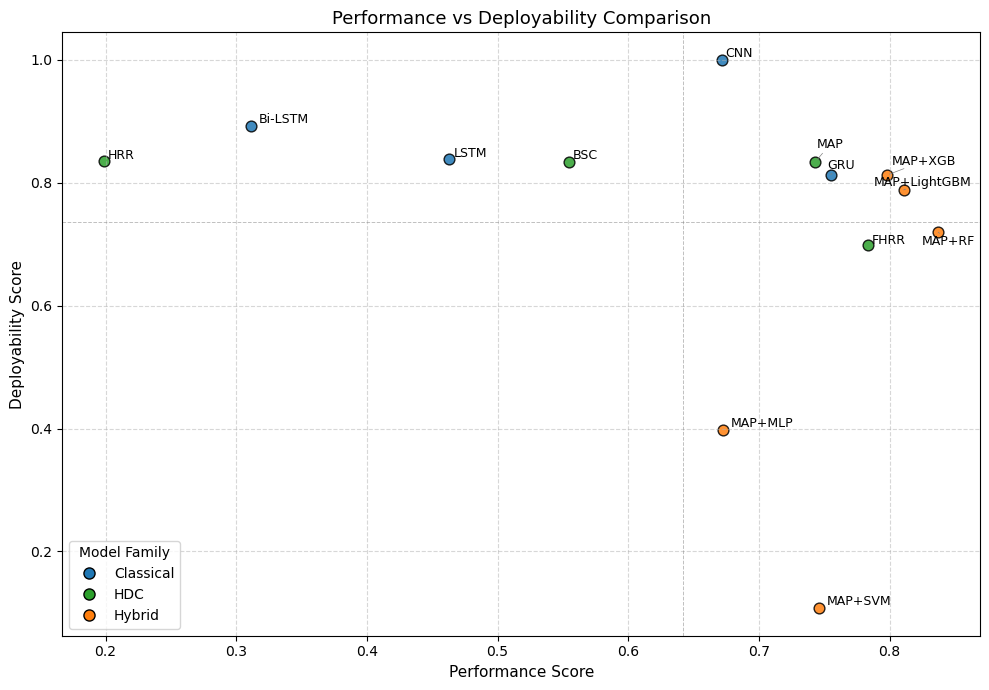

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from adjustText import adjust_text

# -------------------------------
# Raw Data
# -------------------------------
data = [
    ["Bi-LSTM", 0.420, 0.572, 0.685, 16.98, 0.70, 0.204, 189.03],
    ["CNN",     0.490, 0.629, 0.773, 0.26,  0.03, 0.003, 179.92],
    ["GRU",     0.579, 0.851, 0.726, 29.50, 0.18, 0.354, 181.05],
    ["LSTM",    0.499, 0.634, 0.695, 25.61, 0.23, 0.307, 181.88],
    ["BSC",     0.468, 0.611, 0.744, 11.07, 61.21, 0.133, 881.95],
    ["HRR",     0.241, 0.367, 0.755, 10.87, 61.21, 0.130, 882.94],
    ["FHRR",    0.650, 0.660, 0.742, 24.37, 61.21, 0.292, 1297.80],
    ["MAP",     0.612, 0.672, 0.741, 11.16, 61.21, 0.134, 880.67],
    ["MAP+RF",       0.676, 0.624, 0.757, 12.67, 274.35, 0.198, 1324.55],
    ["MAP+SVM",      0.582, 0.678, 0.753, 61.72, 1399.01, 0.741, 2222.70],
    ["MAP+MLP",      0.600, 0.600, 0.734, 78.55, 80.97, 0.943, 900.41],
    ["MAP+XGB",      0.626, 0.626, 0.763, 14.23, 62.18, 0.171, 893.41],
    ["MAP+LightGBM", 0.630, 0.620, 0.767, 17.90, 62.64, 0.215, 897.80],
]
columns = ["Model", "Drunk Accuracy", "F1", "ROC-AUC", "Inference (ms)", "Model Size (MB)", "Energy (J)", "Total RAM"]
df = pd.DataFrame(data, columns=columns)

# -------------------------------
# Category Mapping
# -------------------------------
category_map = {
    "Bi-LSTM": "Classical", "CNN": "Classical", "GRU": "Classical", "LSTM": "Classical",
    "BSC": "HDC", "HRR": "HDC", "FHRR": "HDC", "MAP": "HDC",
    "MAP+RF": "Hybrid", "MAP+SVM": "Hybrid", "MAP+MLP": "Hybrid", "MAP+XGB": "Hybrid", "MAP+LightGBM": "Hybrid",
}
colors = {"Classical": "tab:blue", "HDC": "tab:green", "Hybrid": "tab:orange"}

# -------------------------------
# Metric Weights
# -------------------------------
perf_weights = {"Drunk Accuracy": 0.5, "F1": 0.25, "ROC-AUC": 0.25}
deploy_weights = {"Inference (ms)": 0.25, "Model Size (MB)": 0.25, "Energy (J)": 0.25, "Total RAM": 0.25}

# -------------------------------
# Deployability Score (invert + normalize + weight)
# -------------------------------
df_deploy = df.copy()
for col in deploy_weights:
    df_deploy[col] = df_deploy[col].max() - df_deploy[col]

deploy_scaled = MinMaxScaler().fit_transform(df_deploy[list(deploy_weights.keys())])
deploy_score = np.dot(deploy_scaled, np.array(list(deploy_weights.values())))

# -------------------------------
# Performance Score (normalize + weight)
# -------------------------------
perf_scaled = MinMaxScaler().fit_transform(df[list(perf_weights.keys())])
perf_score = np.dot(perf_scaled, np.array(list(perf_weights.values())))

# -------------------------------
# 2D Plot
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 7))
texts = []
seen = set()

for i, row in df.iterrows():
    model = row["Model"]
    category = category_map[model]
    ax.scatter(perf_score[i], deploy_score[i], color=colors[category], label=category if category not in seen else "", s=60, edgecolor='k', alpha=0.85)
    seen.add(category)
    texts.append(ax.text(perf_score[i], deploy_score[i], model, fontsize=9))

# Improve label placement
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Mean lines
ax.axhline(np.mean(deploy_score), color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
ax.axvline(np.mean(perf_score), color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Axis labels and title
ax.set_xlabel("Performance Score", fontsize=11)
ax.set_ylabel("Deployability Score", fontsize=11)
ax.set_title("Performance vs Deployability Comparison", fontsize=13)
ax.grid(True, linestyle='--', alpha=0.5)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                      markerfacecolor=val, markeredgecolor='k', markersize=8) for key, val in colors.items()]
ax.legend(handles=handles, loc="lower left", fontsize=10, title="Model Family")

plt.tight_layout()
plt.show()


In [ ]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# -------------------------------
# Raw Model Data
# -------------------------------
models = [
    "Bi-LSTM", "CNN", "GRU", "LSTM", "BSC", "HRR", "FHRR", "MAP",
    "MAP+RF", "MAP+SVM", "MAP+MLP", "MAP+XGB", "MAP+LightGBM"
]

data = pd.DataFrame({
    "Model": models,
    "Drunk Accuracy": [0.420, 0.490, 0.579, 0.499, 0.468, 0.241, 0.650, 0.612, 0.676, 0.582, 0.600, 0.626, 0.630],
    "Inference Time (ms)": [16.98, 0.26, 29.50, 25.61, 11.07, 10.87, 24.37, 11.16, 12.67, 61.72, 78.55, 14.23, 17.90],
    "Energy (J)": [0.204, 0.003, 0.354, 0.307, 0.133, 0.130, 0.292, 0.134, 0.198, 0.741, 0.943, 0.171, 0.215],
    "Total RAM": [189.03, 179.92, 181.05, 181.88, 881.95, 882.94, 1297.80, 880.67, 1324.55, 2222.70, 900.41, 893.41, 897.80],
})

# -------------------------------
# Define Filtering Criteria
# -------------------------------
criteria = [
    ("Drunk Accuracy ≥ 0.5", "Drunk Accuracy", lambda x: x >= 0.5),
    ("Inference Time ≤ 50 ms", "Inference Time (ms)", lambda x: x <= 50),
    ("Energy ≤ 0.3 J", "Energy (J)", lambda x: x <= 0.3),
    ("RAM ≤ 1000 MB", "Total RAM", lambda x: x <= 1000)
]

# -------------------------------
# Setup
# -------------------------------
labels = []
label_indices = {}
flows = []
color_map = []
failed_at = {model: None for model in data["Model"]}
last_node = {model: "Start" for model in data["Model"]}

def add_label(name):
    if name not in label_indices:
        label_indices[name] = len(labels)
        labels.append(name)

# Initial label
add_label("Start")

# Step 0: Start ➝ First Criterion
first_label = criteria[0][0]
add_label(first_label)
# flows.append(("Start", first_label, len(models)))
# color_map.append("rgba(0,200,0,0.4)")
# for model in models:
#     last_node[model] = first_label

# -------------------------------
# Filtering Steps
# -------------------------------
for i, (desc, col, cond) in enumerate(criteria):
    pass_label = desc
    fail_label = f"Filtered out"
    add_label(pass_label)
    add_label(fail_label)

    for model in models:
        if failed_at[model] is not None:
            continue  # already failed

        val = data.loc[data["Model"] == model, col].values[0]
        if cond(pd.Series([val])).bool():
            flows.append((last_node[model], pass_label, 1))
            color_map.append("rgba(0,200,0,0.4)")
            last_node[model] = pass_label
        else:
            # 🔥 This is the ONLY thing that was wrong: use `pass_label` as the origin
            flows.append((pass_label, fail_label, 1))
            color_map.append("rgba(255,50,50,0.3)")
            failed_at[model] = desc
            last_node[model] = fail_label

# -------------------------------
# Final Acceptance
# -------------------------------
accepted_label = f"Accepted ({sum(v is None for v in failed_at.values())})"
add_label(accepted_label)

for model in models:
    if failed_at[model] is None:
        flows.append((last_node[model], accepted_label, 1))
        color_map.append("rgba(0,150,0,0.6)")
        last_node[model] = accepted_label

# -------------------------------
# Sankey Conversion
# -------------------------------
from collections import Counter
counted_flows = Counter((src, tgt) for src, tgt, _ in flows)

source, target, value = [], [], []
final_colors = []

for (src, tgt), count in counted_flows.items():
    source.append(label_indices[src])
    target.append(label_indices[tgt])
    value.append(count)
    if "Filtered" in tgt:
        final_colors.append("rgba(255,50,50,0.3)")
    elif "Accepted" in tgt:
        final_colors.append("rgba(0,150,0,0.6)")
    else:
        final_colors.append("rgba(0,200,0,0.4)")

# -------------------------------
# Sankey Plot
# -------------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=10,  # Increased from 30 to 40
        thickness=30,  # Increased from 20 to 30
        line=dict(color="black", width=0.5),
        label=labels,
        color=[
            "#f0f0f0" if "Filtered" not in lbl and "Accepted" not in lbl else
            "#ffe5e5" if "Filtered" in lbl else "#e0f5e0"
            for lbl in labels
        ]
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=final_colors
    )
)])

fig.update_layout(
    title_text="Model Filtering Sankey Diagram",
    font=dict(size=13),  # Slightly larger for legibility
    margin=dict(l=5, r=5, t=90, b=50),  # More room around edges
    height=400,  # Increased canvas height
)
fig.show()


# -------------------------------
# Failure Breakdown
# -------------------------------
print("\nFailure breakdown by model:")
for model in models:
    print(f"{model}: {'✔️ Passed all' if failed_at[model] is None else f'❌ Failed at ' + failed_at[model]}")


/var/folders/7h/bnm4bckj5sjf5tj3bvctw_7h0000gn/T/ipykernel_79726/3584615092.py:71: FutureWarning:

Series.bool is now deprecated and will be removed in future version of pandas




Failure breakdown by model:
Bi-LSTM: ❌ Failed at Drunk Accuracy ≥ 0.5
CNN: ❌ Failed at Drunk Accuracy ≥ 0.5
GRU: ❌ Failed at Energy ≤ 0.3 J
LSTM: ❌ Failed at Drunk Accuracy ≥ 0.5
BSC: ❌ Failed at Drunk Accuracy ≥ 0.5
HRR: ❌ Failed at Drunk Accuracy ≥ 0.5
FHRR: ❌ Failed at RAM ≤ 1000 MB
MAP: ✔️ Passed all
MAP+RF: ❌ Failed at RAM ≤ 1000 MB
MAP+SVM: ❌ Failed at Inference Time ≤ 50 ms
MAP+MLP: ❌ Failed at Inference Time ≤ 50 ms
MAP+XGB: ✔️ Passed all
MAP+LightGBM: ✔️ Passed all
